5. For the given problem, construct a Bayesian Network and general-purpose decision tree.
Compare results. What differences do you observe? Explain.
Predict the probability that children would be playing outdoors given weather
conditions.

In [ ]:
!pip install pgmpy

In [12]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#loading dataset
dataset = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
#lading dat5frame
df1 = pd.DataFrame(dataset)
df1

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [14]:
# creating model for  Bayesian Network and printing result
from pgmpy.inference import VariableElimination

BNmodel = BayesianNetwork([('Temp','Outlook'), ('Humidity','Outlook'),('Temp','Humidity'),('Windy','Outlook'),('Outlook', 'Play'), ('Temp', 'Play'), ('Humidity', 'Play'), ('Windy', 'Play')])
BNmodel.fit(df1)

#inference calculation using variable Elimination
VE_infrnce = VariableElimination(BNmodel)

# Prediction
Final_outcome = VE_infrnce.query(variables=['Play'], evidence={'Outlook': 'Sunny', 'Temp': 'Hot', 'Humidity': 'High', 'Windy': False})
print(Final_outcome)


+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      1.0000 |
+-----------+-------------+
| Play(Yes) |      0.0000 |
+-----------+-------------+


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Transformation
labelenc = LabelEncoder()
Encoded = df1.apply(labelenc.fit_transform)

# feature separtion
X = Encoded.drop(columns=['Play'])
y = Encoded['Play']

print(X,y)
#print(y)
# model training
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Prediction
prediction = clf.predict([[2, 1, 0, 0]])
print(prediction)


    Outlook  Temp  Humidity  Windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


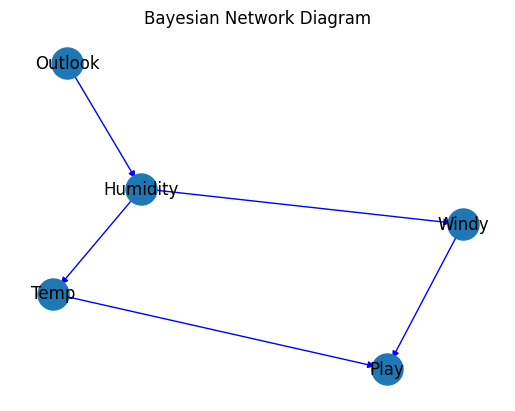

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()

# Add nodes
graph.add_node('Outlook')
graph.add_node('Temp')
graph.add_node('Humidity')
graph.add_node('Windy')
graph.add_node('Play')

# Add edges
graph.add_edge('Outlook', 'Humidity')
graph.add_edge('Humidity', 'Temp')
graph.add_edge('Humidity', 'Windy')
graph.add_edge('Temp', 'Play')
graph.add_edge('Windy', 'Play')


position = nx.spring_layout(graph)

# Draw nodes and edges
nx.draw_networkx_nodes(graph, position, node_size=500)
nx.draw_networkx_labels(graph, position)
nx.draw_networkx_edges(graph, position, edge_color='blue', arrows=True)

# Display the graph
plt.title("Bayesian Network Diagram")
plt.axis('off')
plt.show()